In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("../sideproject/데이콘_신용데이터/train.csv")

In [11]:
df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [12]:
# ID값은 의미가 없기 때문에 제거하고 조회
df.drop(['ID'], axis=1, inplace=True)
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [13]:
# 데이터의 형식 및 null값을 확인하기 위해 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 10.3+ MB


In [14]:
df.isna().sum()

대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [15]:
# 범주형 데이터의 범주 확인
#df.loc[:,'대출목적'].unique()
category_lon_purpose = df['대출목적'].value_counts()
print(category_lon_purpose)

category_house = df['주택소유상태'].value_counts()
print("\n",category_house)

category_jobspend = df['근로기간'].value_counts()
print("\n", category_jobspend)

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

 주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

 근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64


In [16]:
# 주택소유상태에서 ANY가 1개가 있어 조회하여 확인
df.loc[(df['주택소유상태'] == 'ANY')]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [17]:
# ANY 데이터를 삭제하여 주택소유상태의 범주를 줄임
ANY_drop = (df['주택소유상태'] == 'ANY')
df.drop(df[ANY_drop].index, inplace=True)

In [18]:
# 근로기간이 object 형태로 되어 있어 숫자형으로 바꾸기 위한 전처리
df['근로기간'] = df['근로기간'].apply(lambda x: x.replace('+', ''))
df['근로기간'] = df['근로기간'].apply(lambda x: x.replace('<', ''))
df['근로기간'] = df['근로기간'].apply(lambda x: x.replace('>', ''))
df['근로기간'] = df['근로기간'].apply(lambda x: x.replace('Unknown', '0year'))
df['근로기간'] = df['근로기간'].apply(lambda x: x.replace('years', 'year'))
df['근로기간'] = df['근로기간'].apply(lambda x: int(x.split('year')[0]))

In [19]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,0,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


### 범주가 너무 많아서 시각화하여 확인

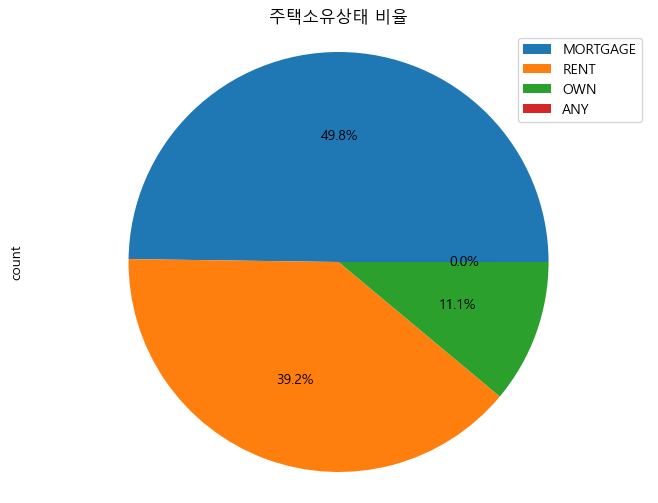

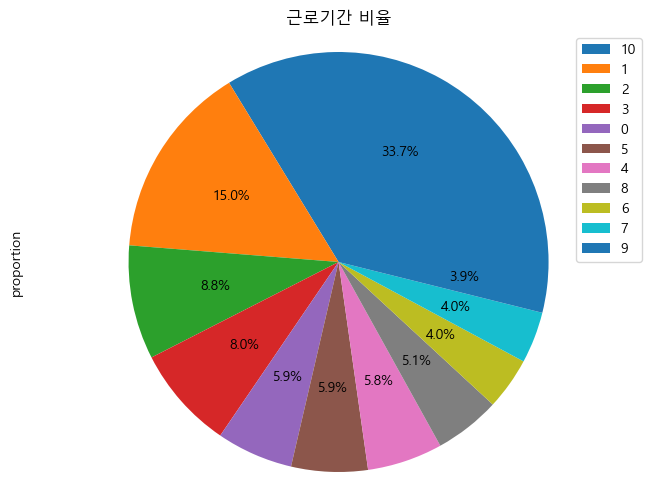

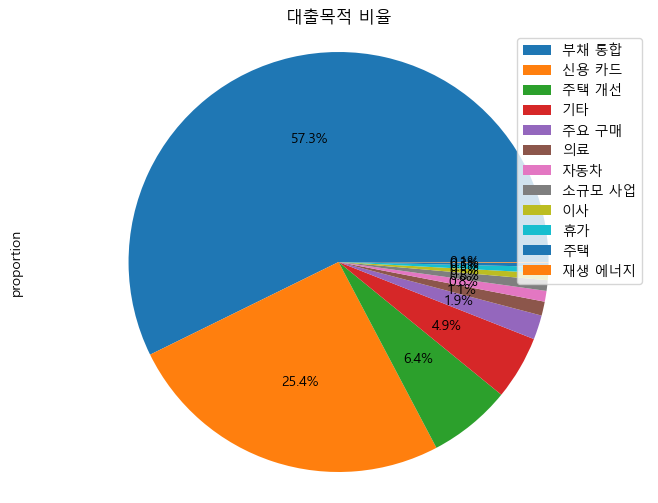

In [20]:
### category_house = df['주택소유상태'].value_counts(normalize=True)
category_jobspend = df['근로기간'].value_counts(normalize=True)
category_loan_purpose = df['대출목적'].value_counts(normalize=True)

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 주택소유상태 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_house.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('주택소유상태 비율')
plt.legend(labels=category_house.index, loc='upper right')
plt.axis('equal')
plt.show()

# 근로기간 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_jobspend.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('근로기간 비율')
plt.legend(labels=category_jobspend.index, loc='upper right')
plt.axis('equal')
plt.show()

# 대출목적 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_loan_purpose.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('대출목적 비율')
plt.legend(labels=category_loan_purpose.index, loc='upper right')
plt.axis('equal')
plt.show()

### 대출기간이 object 타입으로 되어 있어 int 형태로 바꿈
- 36months -> 36
- 60months -> 60

In [21]:
df['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

### 이상치 제거
- 연간소득이 0인 경우 부채대비소득비율이 9999으로 이상치가 되어버림
- 제거하여 이상치를 제거

In [22]:
flag = df['연간소득'] == 0
df.loc[flag,]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,4440000,36 months,0,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [23]:
df.drop(df[flag].index, inplace = True)

In [24]:
cate_df = df[['대출등급','주택소유상태','근로기간','대출목적','대출기간']]
cate_df.head(10)

,대출등급,주택소유상태,근로기간,대출목적,대출기간
0,C,RENT,6,부채 통합,36 months
1,B,MORTGAGE,10,주택 개선,60 months
2,A,MORTGAGE,5,부채 통합,36 months
3,C,MORTGAGE,8,부채 통합,36 months
4,B,RENT,0,주요 구매,60 months
5,A,RENT,10,휴가,36 months
6,D,MORTGAGE,9,휴가,36 months
7,C,RENT,2,부채 통합,60 months
8,D,OWN,10,의료,36 months
9,C,RENT,2,자동차,36 months


In [25]:
cate_df.columns

Index(['대출등급', '주택소유상태', '근로기간', '대출목적', '대출기간'], dtype='object')

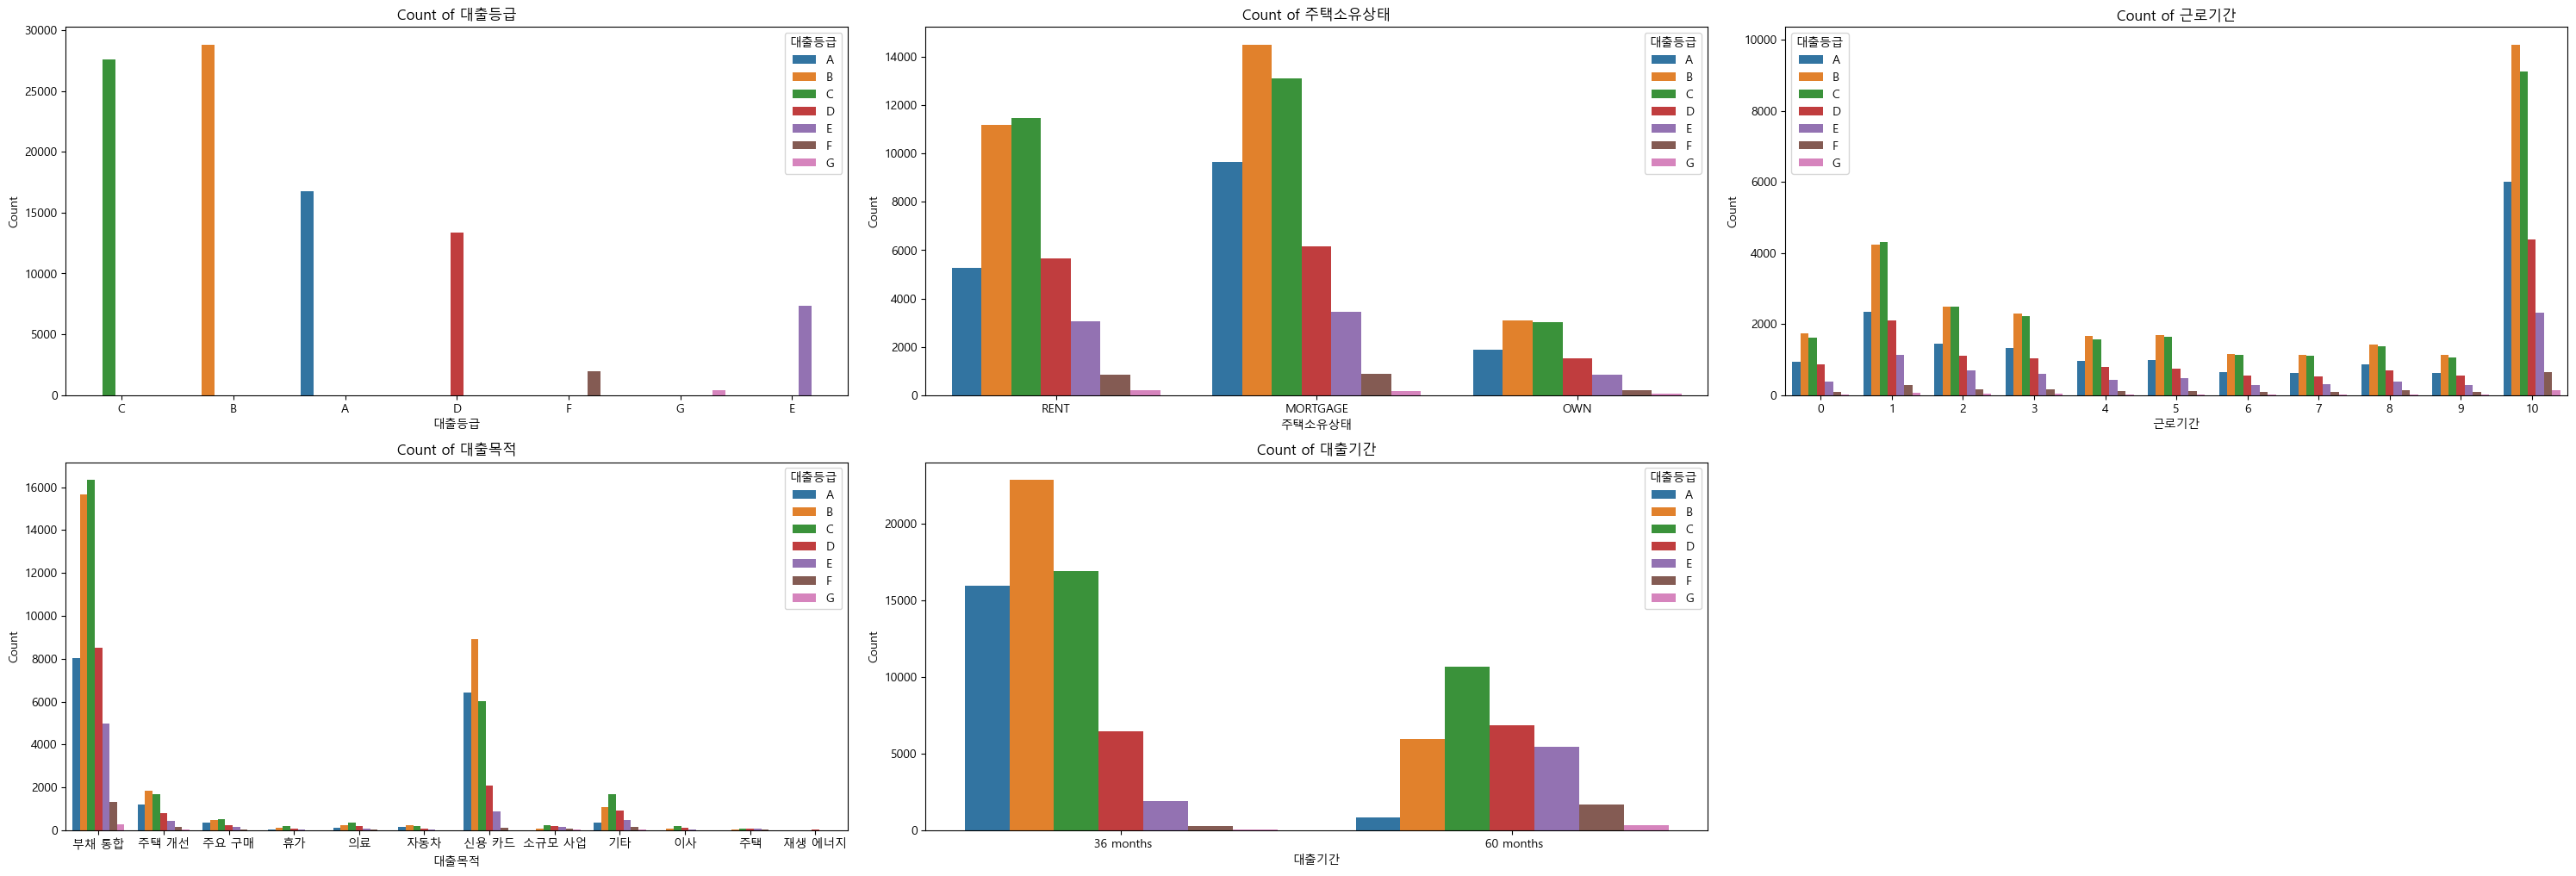

In [26]:
y_order=['A','B','C','D','E','F','G']

plt.figure(figsize=(30, 25))
for i, column in enumerate(cate_df.columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=column, hue='대출등급', data=cate_df, hue_order=y_order)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 대출기간에 따라 신용등급 분포가 다름을 확인
- 대출기간이 길어질수록 DSR 규제를 덜 받기 때문에 대출기간이 긴 경우 대출등급이 낮을 수 있음
- 그러므로 대출기간을 년 단위로 바꾸고 대출금액을 대출기간으로 나누어 1년당 대출금액을 파생변수로 활용

In [28]:
df['대출기간'] = df['대출기간'].apply(lambda x : x.replace(" months",''))
df['대출기간'] = df['대출기간'].apply(lambda x : int(x))
df['대출기간'] = df['대출기간'].apply(lambda x : x/12)

In [29]:
df['대출기간'].unique()

array([3., 5.])

In [30]:
df['1년_대출금액'] = df['대출금액'] / df['대출기간']
df['1년_대출금액']

0        4160000.0
1        2880000.0
2        4000000.0
3        4800000.0
4        3600000.0
           ...    
96289    4800000.0
96290    5760000.0
96291    4800000.0
96292    5200000.0
96293    2880000.0
Name: 1년_대출금액, Length: 96292, dtype: float64

### 총상환원금과 총상환이자를 합쳐서 총상환원리금으로 새로운 파생변수 생성

In [31]:
df['총상환원리금'] = df['총상환원금'] + df['총상환이자']
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,12480000,3.0,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,4160000.0,0.0
1,14400000,5.0,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,2880000.0,607632.0
2,12000000,3.0,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,4000000.0,1080588.0
3,14400000,3.0,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,4800000.0,478932.0
4,18000000,5.0,0,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,3600000.0,377496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,3.0,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,4800000.0,1466748.0
96290,28800000,5.0,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,5760000.0,1438812.0
96291,14400000,3.0,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,4800000.0,1730364.0
96292,15600000,3.0,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,5200000.0,2196444.0


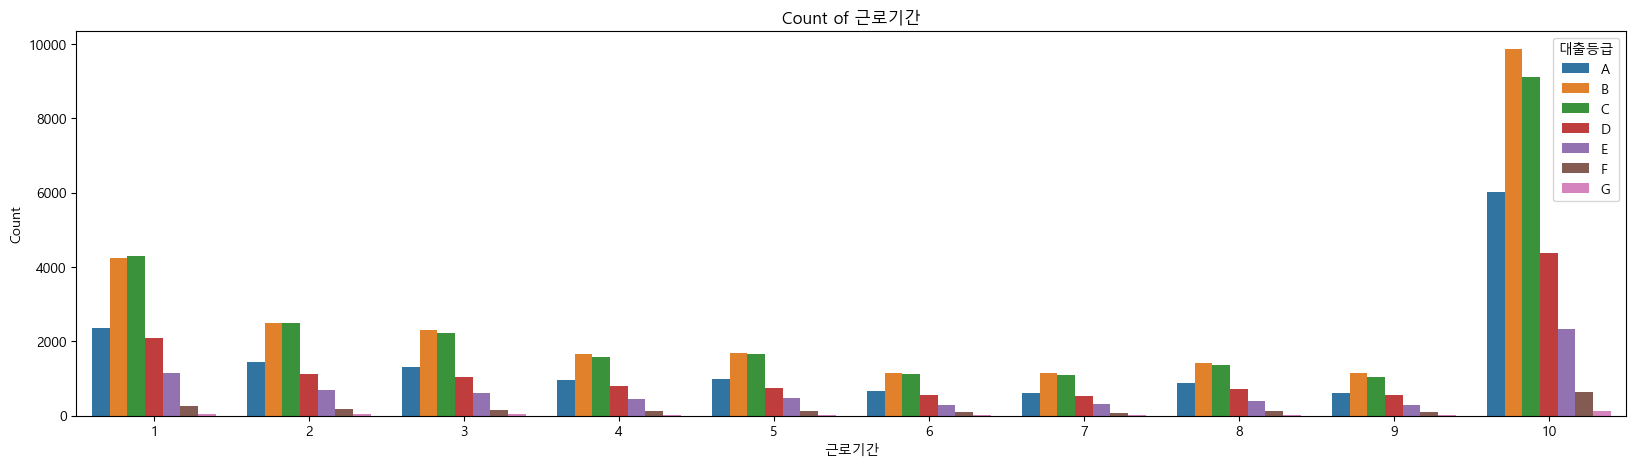

In [32]:
years_order = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(20,5))
sns.countplot(x='근로기간', hue='대출등급', hue_order=y_order, order=years_order, data=cate_df)
plt.title('Count of 근로기간')
plt.xlabel('근로기간')
plt.ylabel('Count')
plt.show()

### 범주형 데이터 전처리
#### 대출목적 : 범주가 9개, 데이터가 고차원으로 되는 것을 방지하기 위해 frequency-encoding
#### 주택소유상태 : 범주 4개, frequency-encoding, 이유는 상동.
#### 대출기간은 2개의 범주, Labeling-encoding

In [33]:
frequency_encoding = cate_df['대출목적'].value_counts(normalize = True)
cate_df['대출목적'] = cate_df['대출목적'].map(frequency_encoding)

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_3372\3797203024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_df['대출목적'] = cate_df['대출목적'].map(frequency_encoding)


In [34]:
frequency_encoding = cate_df['주택소유상태'].value_counts(normalize = True)
cate_df['주택소유상태'] = cate_df['주택소유상태'].map(frequency_encoding)

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_3372\742181810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_df['주택소유상태'] = cate_df['주택소유상태'].map(frequency_encoding)


In [35]:
label_encoder = LabelEncoder()
cate_df['대출기간'] = label_encoder.fit_transform(cate_df['대출기간'])

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_3372\564734718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_df['대출기간'] = label_encoder.fit_transform(cate_df['대출기간'])


In [36]:
cate_df

,대출등급,주택소유상태,근로기간,대출목적,대출기간
0,C,0.391569,6,0.572737,0
1,B,0.497788,10,0.063972,1
2,A,0.497788,5,0.572737,0
3,C,0.497788,8,0.572737,0
4,B,0.391569,0,0.018724,1
...,...,...,...,...,...
96289,C,0.497788,10,0.254424,0
96290,E,0.497788,10,0.063972,1
96291,A,0.497788,1,0.254424,0
96292,D,0.497788,5,0.572737,0


In [37]:
df[['대출등급', '주택소유상태','근로기간','대출목적','대출기간']] = cate_df[['대출등급', '주택소유상태','근로기간','대출목적','대출기간']]
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,12480000,0,6,0.391569,72000000,18.90,15,0.572737,0,0,0.0,0.0,0.0,C,4160000.0,0.0
1,14400000,1,10,0.497788,130800000,22.33,21,0.063972,0,373572,234060.0,0.0,0.0,B,2880000.0,607632.0
2,12000000,0,5,0.497788,96000000,8.60,14,0.572737,0,928644,151944.0,0.0,0.0,A,4000000.0,1080588.0
3,14400000,0,8,0.497788,132000000,15.09,15,0.572737,0,325824,153108.0,0.0,0.0,C,4800000.0,478932.0
4,18000000,1,0,0.391569,71736000,25.39,19,0.018724,0,228540,148956.0,0.0,0.0,B,3600000.0,377496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,0.497788,210000000,9.33,33,0.254424,0,974580,492168.0,0.0,0.0,C,4800000.0,1466748.0
96290,28800000,1,10,0.497788,132000000,5.16,25,0.063972,0,583728,855084.0,0.0,0.0,E,5760000.0,1438812.0
96291,14400000,0,1,0.497788,84000000,11.24,22,0.254424,0,1489128,241236.0,0.0,0.0,A,4800000.0,1730364.0
96292,15600000,0,5,0.497788,66330000,17.30,21,0.572737,2,1378368,818076.0,0.0,0.0,D,5200000.0,2196444.0


In [38]:
df_num = df.drop(columns = ['주택소유상태','대출목적','대출등급'])

In [39]:
df_num

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,1년_대출금액,총상환원리금
0,12480000,0,6,72000000,18.90,15,0,0,0.0,0.0,0.0,4160000.0,0.0
1,14400000,1,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0,2880000.0,607632.0
2,12000000,0,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0,4000000.0,1080588.0
3,14400000,0,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0,4800000.0,478932.0
4,18000000,1,0,71736000,25.39,19,0,228540,148956.0,0.0,0.0,3600000.0,377496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,210000000,9.33,33,0,974580,492168.0,0.0,0.0,4800000.0,1466748.0
96290,28800000,1,10,132000000,5.16,25,0,583728,855084.0,0.0,0.0,5760000.0,1438812.0
96291,14400000,0,1,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,4800000.0,1730364.0
96292,15600000,0,5,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,5200000.0,2196444.0


C:\Users\hyungjun\AppData\Local\Temp\ipykernel_3372\402486859.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


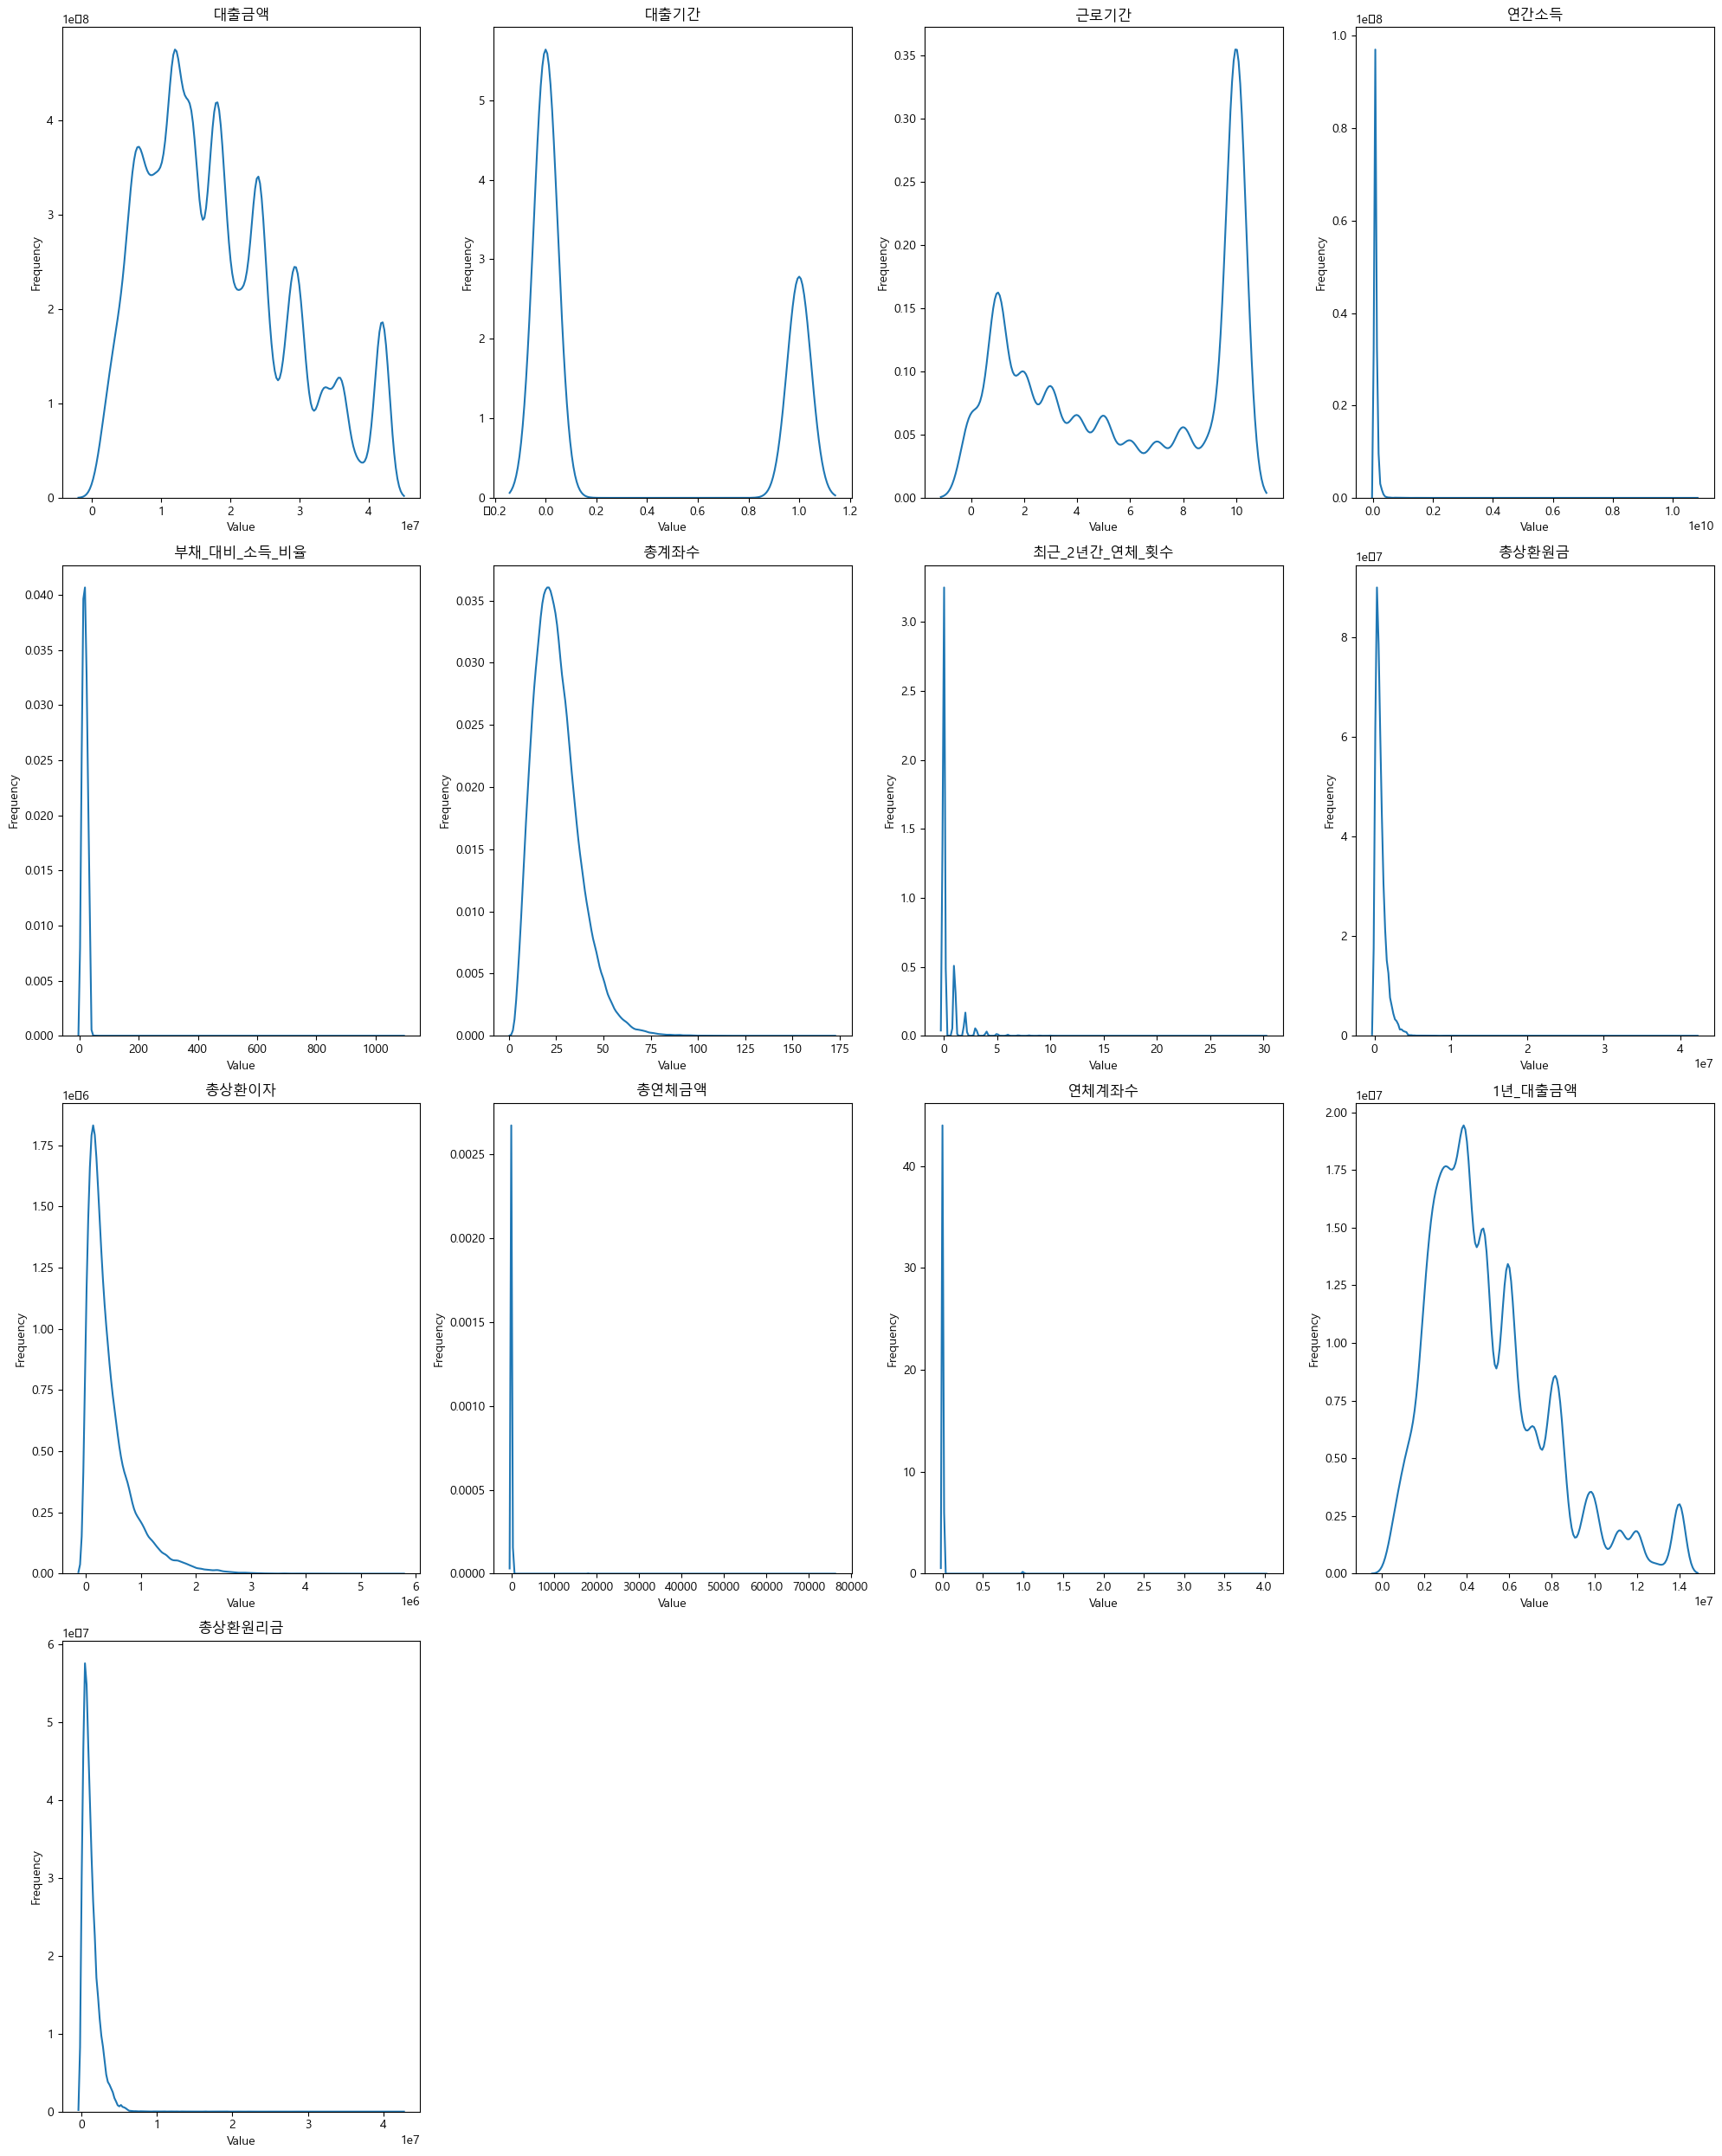

In [40]:
plt.figure(figsize=(20,25))

for i, column in enumerate(df_num.columns):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df_num[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:
df_num.sort_values("최근_2년간_연체_횟수")

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,1년_대출금액,총상환원리금
0,12480000,0,6,72000000,18.90,15,0,0,0.0,0.0,0.0,4160000.0,0.0
60587,12000000,0,10,50400000,20.01,27,0,583920,175068.0,0.0,0.0,4000000.0,758988.0
60585,9480000,0,1,115200000,13.85,25,0,474408,109452.0,0.0,0.0,3160000.0,583860.0
60584,10800000,0,10,153600000,23.43,46,0,1073784,278652.0,0.0,0.0,3600000.0,1352436.0
60583,36000000,1,6,270000000,7.77,28,0,1536372,2073600.0,0.0,0.0,7200000.0,3609972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,18600000,0,8,68400000,18.43,59,16,905088,271344.0,0.0,0.0,6200000.0,1176432.0
36237,20160000,0,10,67200000,21.24,40,17,1533672,1718580.0,0.0,0.0,6720000.0,3252252.0
18893,9600000,0,2,69600000,22.86,59,18,476016,120468.0,0.0,0.0,3200000.0,596484.0
90386,6840000,0,2,42000000,24.98,30,18,289380,201540.0,0.0,0.0,2280000.0,490920.0


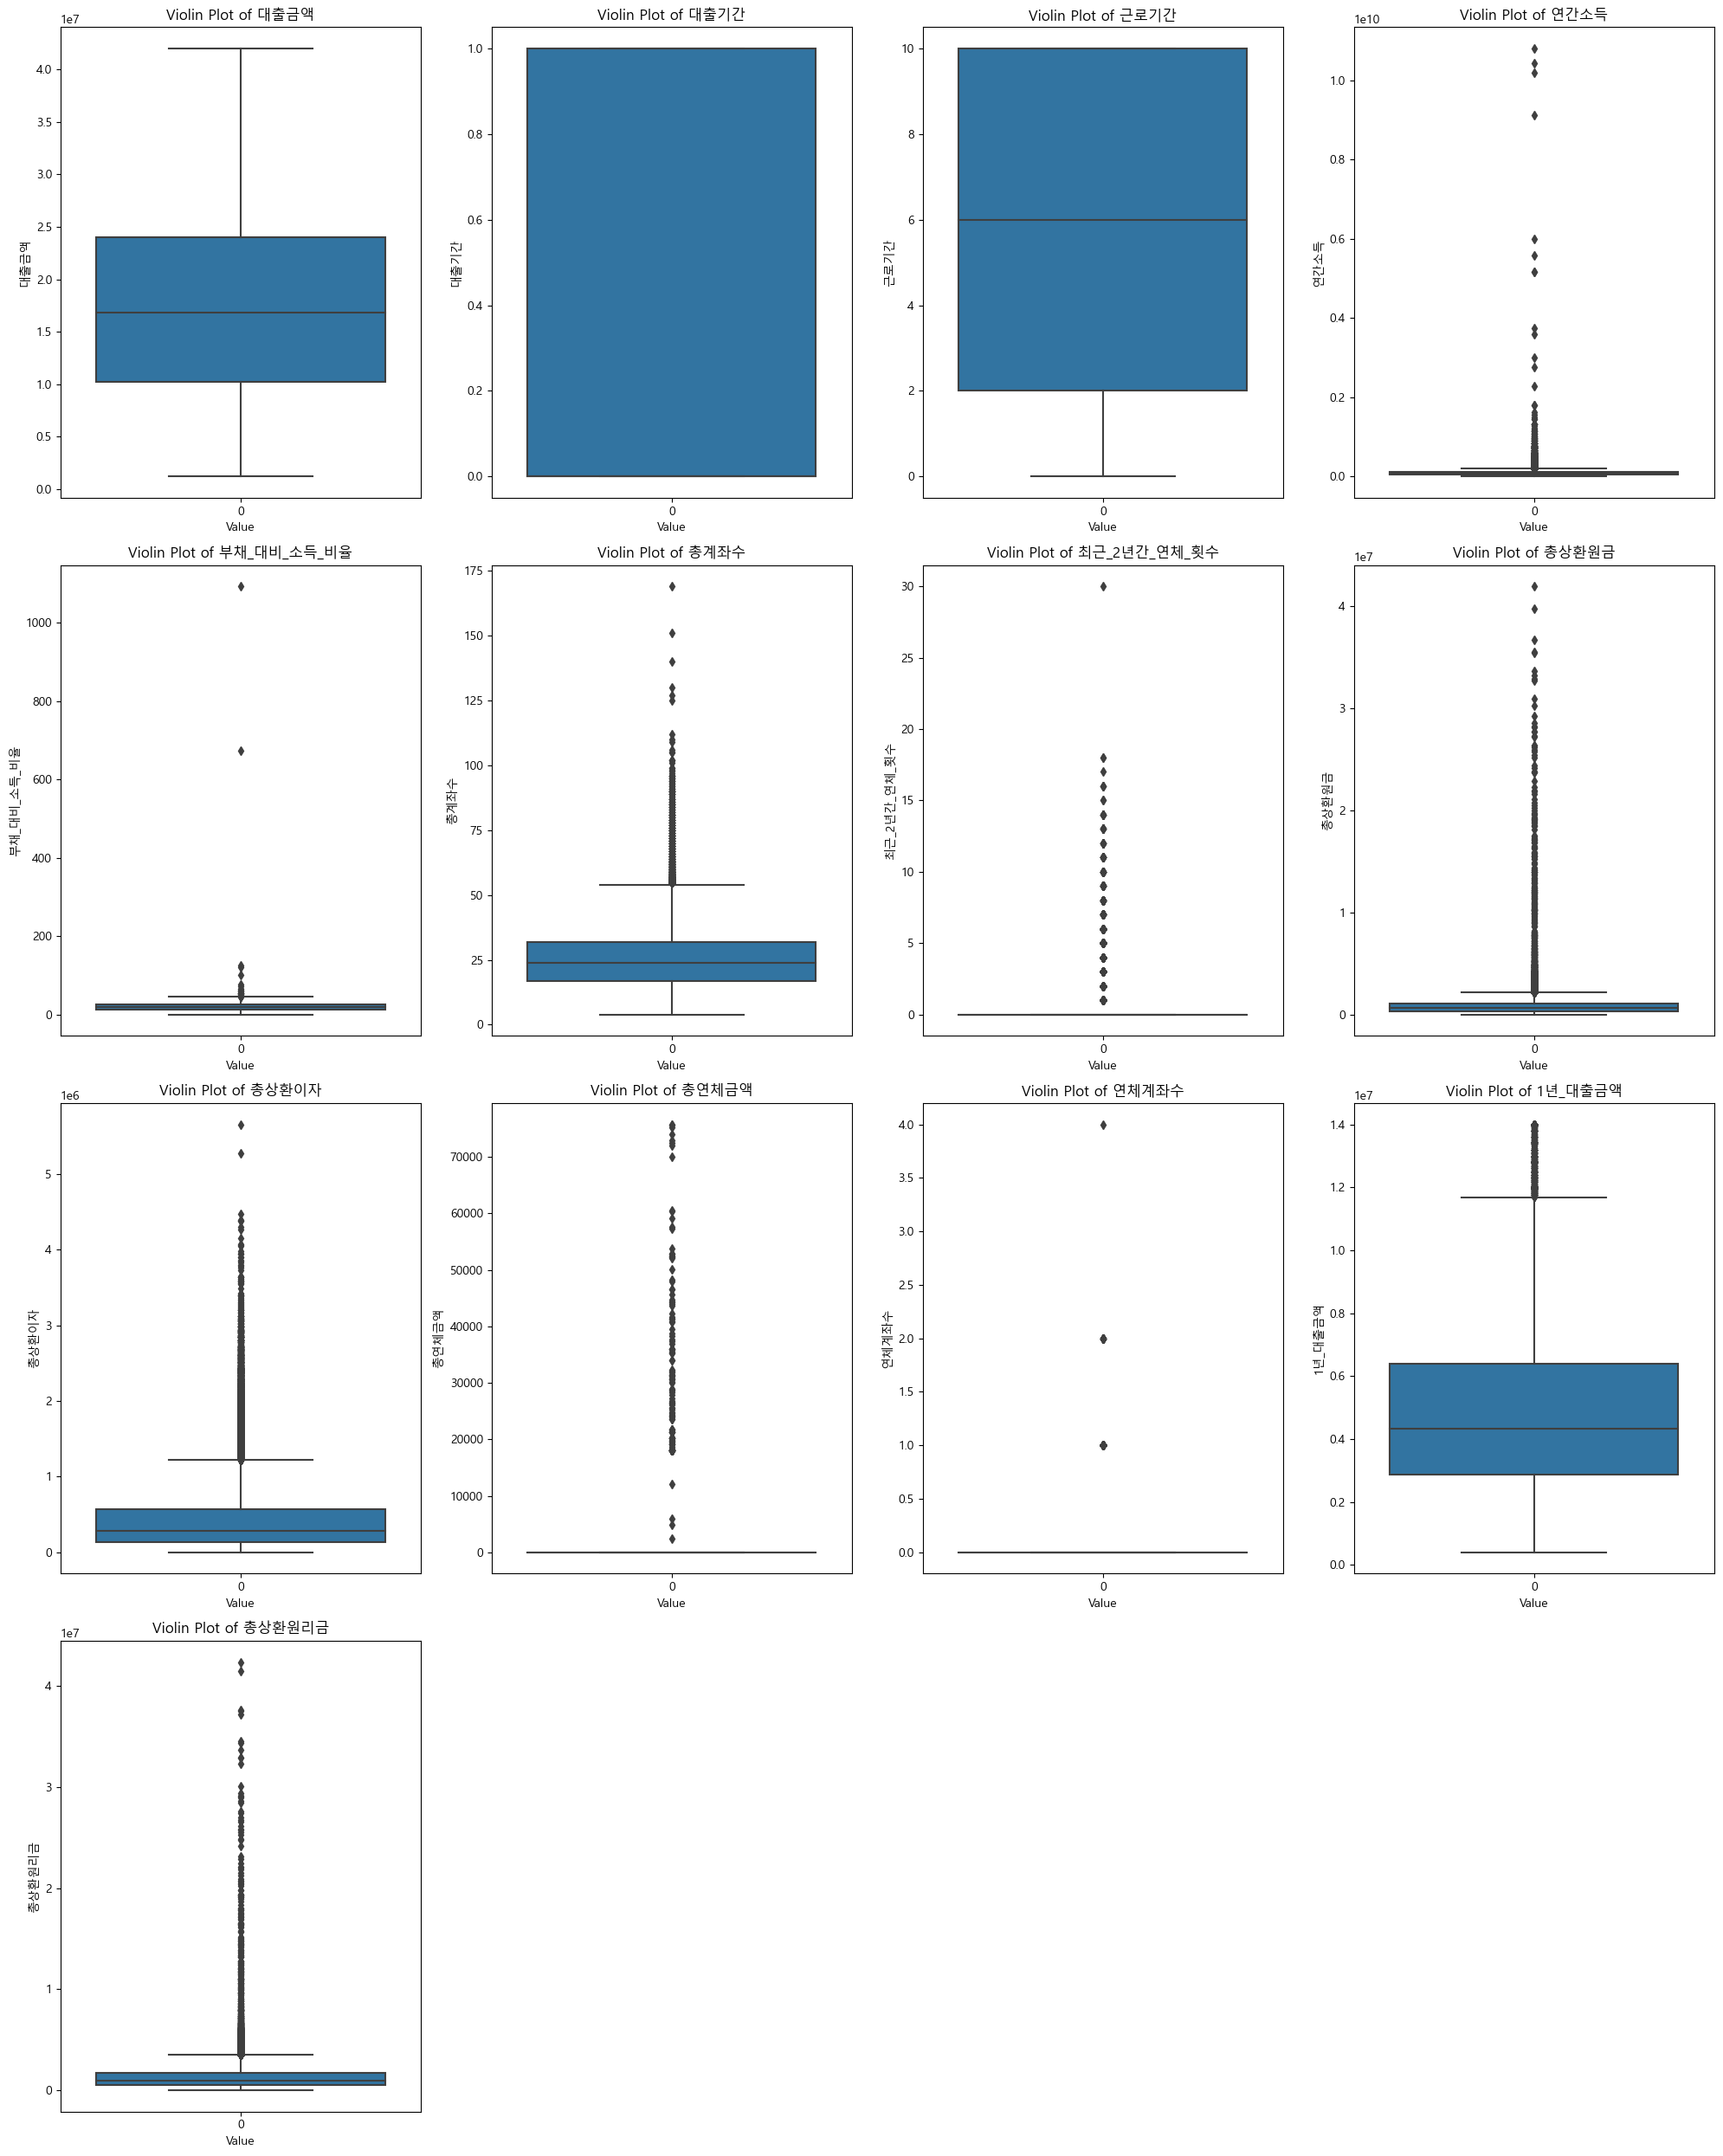

In [42]:
plt.figure(figsize=(20,25))

for i, column in enumerate(df_num.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df_num[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### 분포 형태에 따라 로그변환을 고려

In [43]:
df_num[df_num['최근_2년간_연체_횟수']>10].count()

대출금액            56
대출기간            56
근로기간            56
연간소득            56
부채_대비_소득_비율     56
총계좌수            56
최근_2년간_연체_횟수    56
총상환원금           56
총상환이자           56
총연체금액           56
연체계좌수           56
1년_대출금액         56
총상환원리금          56
dtype: int64

In [44]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,12480000,0,6,0.391569,72000000,18.90,15,0.572737,0,0,0.0,0.0,0.0,C,4160000.0,0.0
1,14400000,1,10,0.497788,130800000,22.33,21,0.063972,0,373572,234060.0,0.0,0.0,B,2880000.0,607632.0
2,12000000,0,5,0.497788,96000000,8.60,14,0.572737,0,928644,151944.0,0.0,0.0,A,4000000.0,1080588.0
3,14400000,0,8,0.497788,132000000,15.09,15,0.572737,0,325824,153108.0,0.0,0.0,C,4800000.0,478932.0
4,18000000,1,0,0.391569,71736000,25.39,19,0.018724,0,228540,148956.0,0.0,0.0,B,3600000.0,377496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,0.497788,210000000,9.33,33,0.254424,0,974580,492168.0,0.0,0.0,C,4800000.0,1466748.0
96290,28800000,1,10,0.497788,132000000,5.16,25,0.063972,0,583728,855084.0,0.0,0.0,E,5760000.0,1438812.0
96291,14400000,0,1,0.497788,84000000,11.24,22,0.254424,0,1489128,241236.0,0.0,0.0,A,4800000.0,1730364.0
96292,15600000,0,5,0.497788,66330000,17.30,21,0.572737,2,1378368,818076.0,0.0,0.0,D,5200000.0,2196444.0


In [45]:
df.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', '1년_대출금액',
       '총상환원리금'],
      dtype='object')

In [46]:
columns_to_log_transform = [col for col in df_num.columns if col not in ['ID', '대출금액', '대출기간', '근로기간']]

# 로그변환 수행
df_num[columns_to_log_transform] = df_num[columns_to_log_transform].apply(lambda x : np.log1p(x))
df_num.describe()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,1년_대출금액,총상환원리금
count,9.629200e+04,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000,96292.000000
mean,1.830390e+07,0.330401,5.738566,18.198983,2.892379,3.162023,0.187452,12.583752,11.891058,0.019083,0.003940,15.265924,13.000869
std,1.032882e+07,0.470360,3.768868,0.536880,0.526975,0.479069,0.400058,3.176265,3.057955,0.440256,0.053310,0.605082,3.272997
min,1.200000e+06,0.000000,0.000000,14.180154,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,12.899222,0.000000
25%,1.020000e+07,0.000000,2.000000,17.869033,2.613740,2.890372,0.000000,12.636468,11.810189,0.000000,0.000000,14.873301,13.082331
50%,1.680000e+07,0.000000,6.000000,18.172219,2.982647,3.218876,0.000000,13.300839,12.567297,0.000000,0.000000,15.278766,13.758852
75%,2.400000e+07,1.000000,10.000000,18.541127,3.278653,3.496508,0.000000,13.869124,13.253799,0.000000,0.000000,15.671809,14.334921
max,4.200000e+07,1.000000,10.000000,23.102812,6.997157,5.135798,3.433987,17.552131,15.547771,11.235445,1.609438,16.454568,17.561192


C:\Users\hyungjun\AppData\Local\Temp\ipykernel_3372\402486859.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


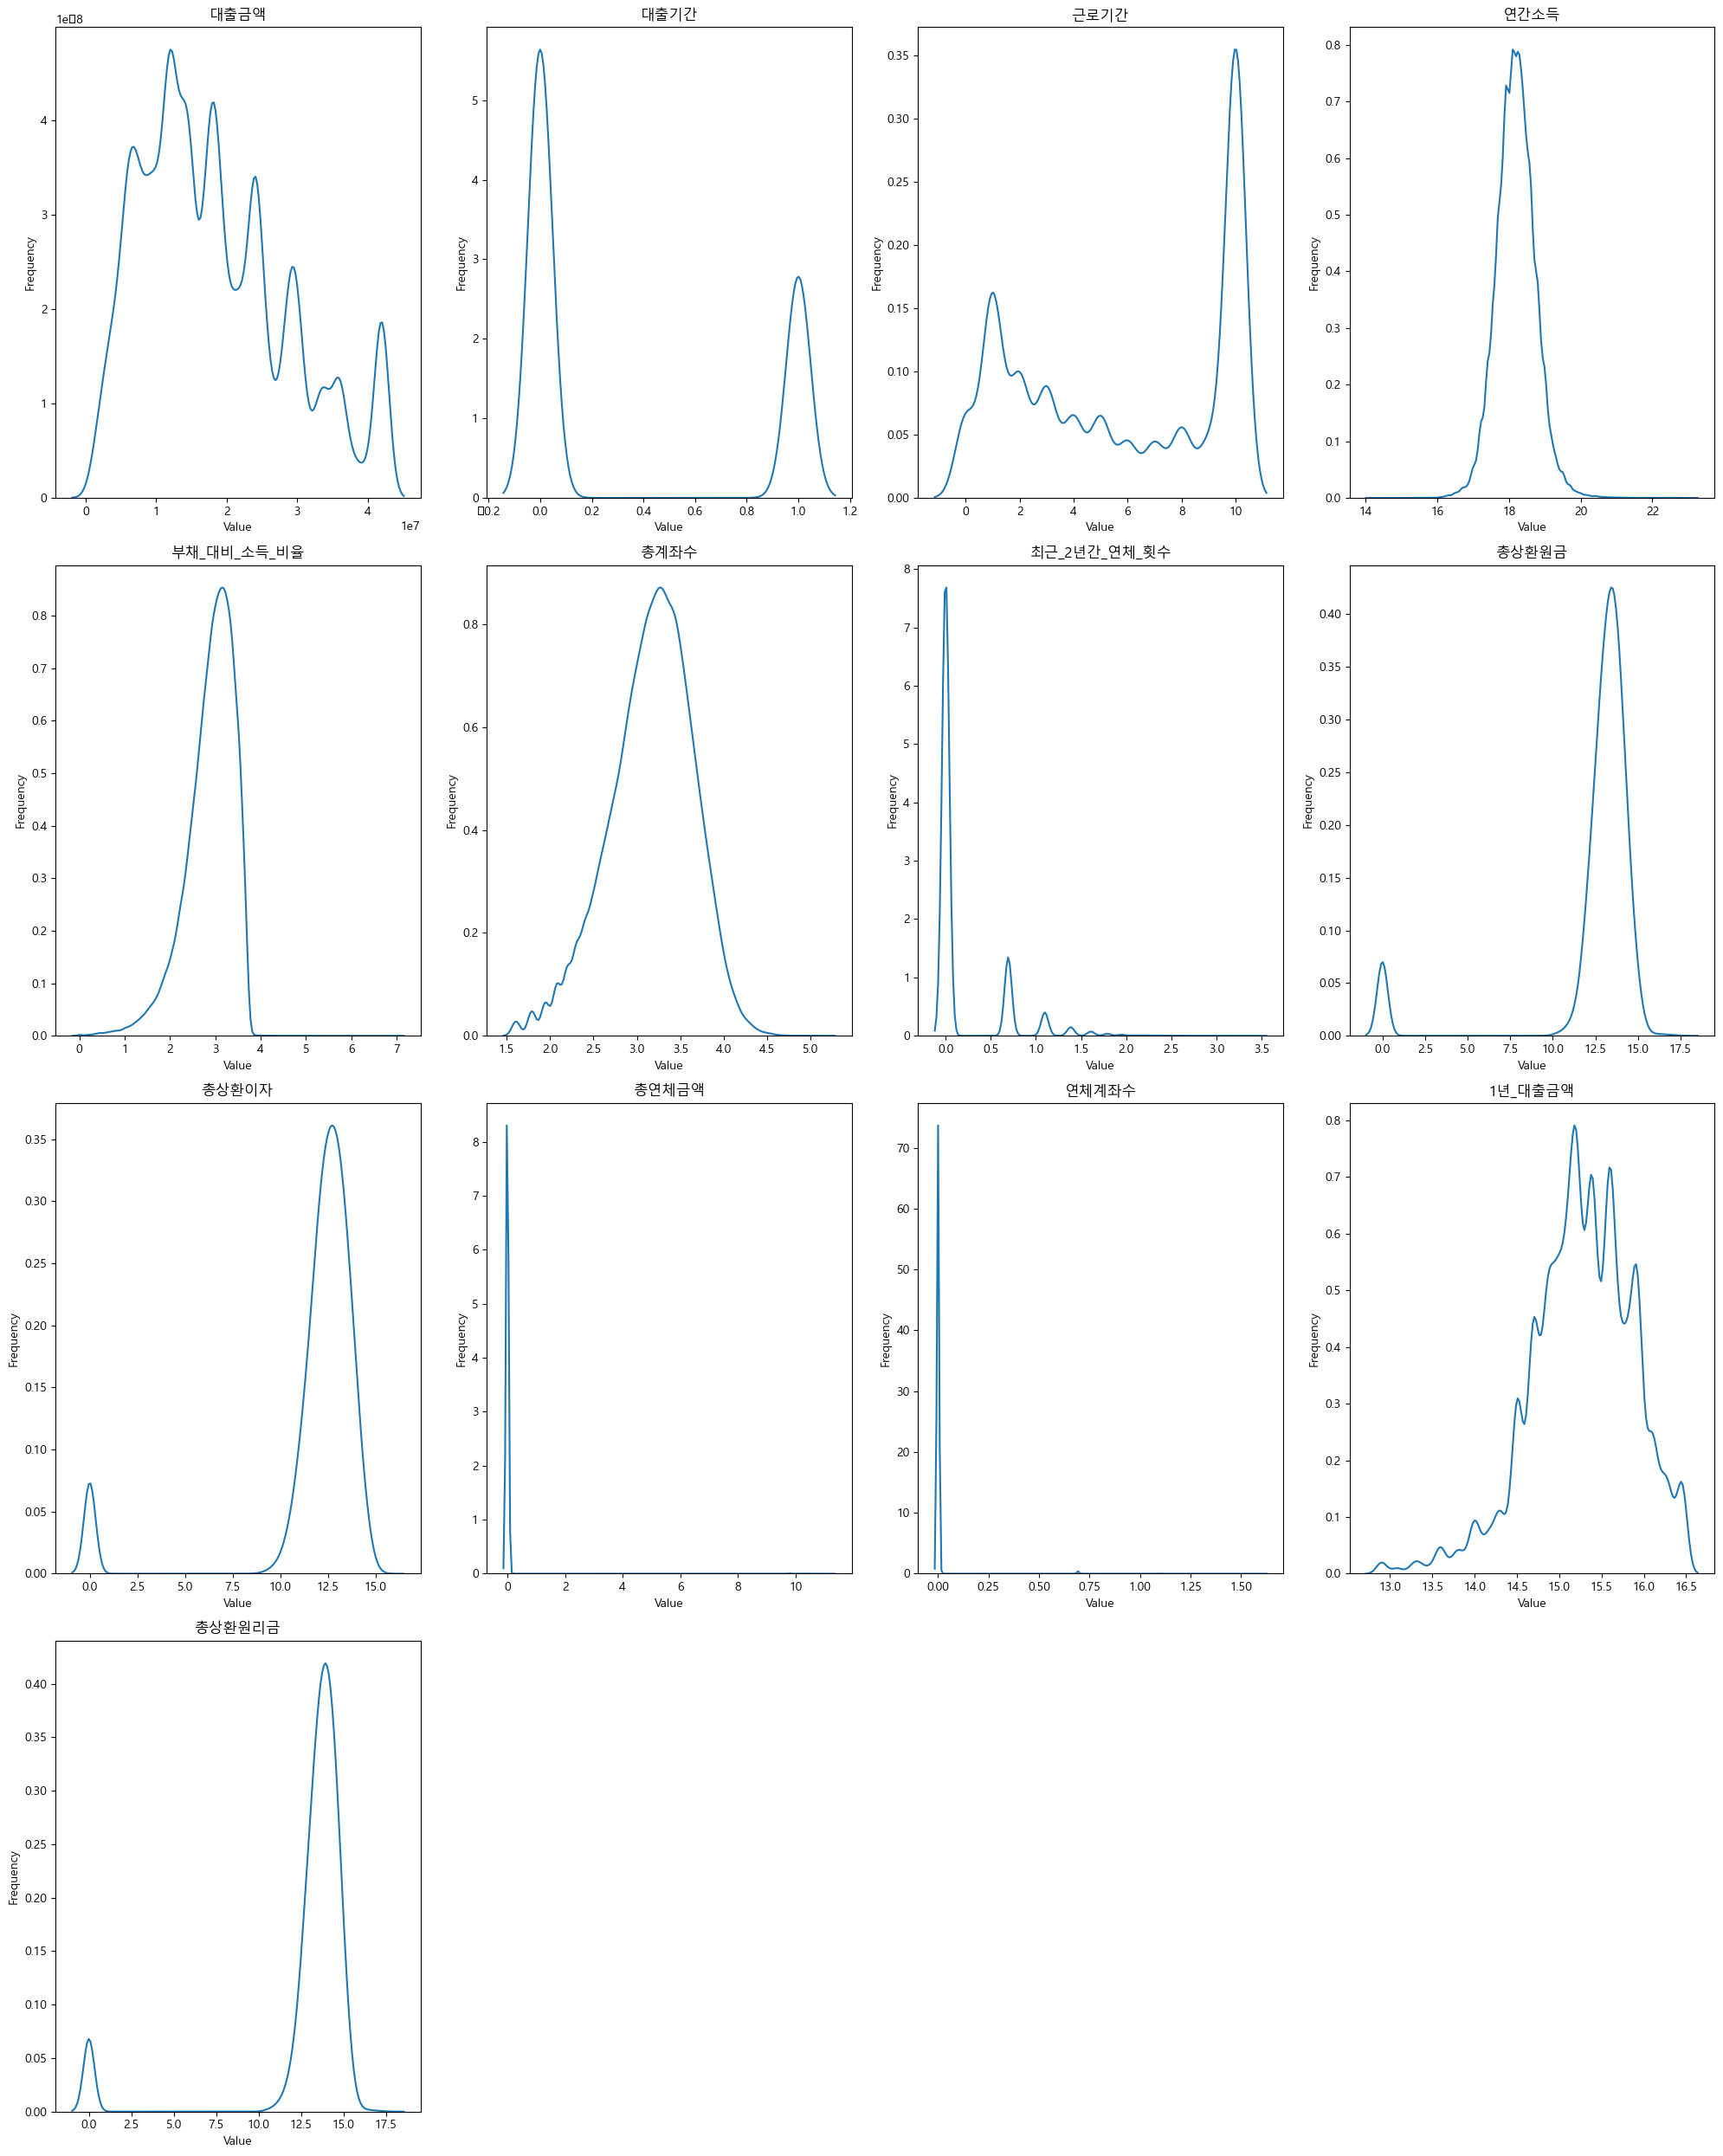

In [47]:
plt.figure(figsize=(20,25))

for i, column in enumerate(df_num.columns):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df_num[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
df[['연간소득','부채_대비_소득_비율','총계좌수','최근_2년간_연체_횟수','총상환원금','총상환이자','총연체금액','연체계좌수','총상환원리금','1년_대출금액']]=df_num[['연간소득','부채_대비_소득_비율','총계좌수','최근_2년간_연체_횟수','총상환원금','총상환이자','총연체금액','연체계좌수','총상환원리금','1년_대출금액']]

In [49]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,1년_대출금액,총상환원리금
0,12480000,0,6,0.391569,18.092177,2.990720,2.772589,0.572737,0.000000,0.000000,0.000000,0.0,0.0,C,15.241026,0.000000
1,14400000,1,10,0.497788,18.689180,3.149740,3.091042,0.063972,0.000000,12.830869,12.363337,0.0,0.0,B,14.873301,13.317326
2,12000000,0,5,0.497788,18.379859,2.261763,2.708050,0.572737,0.000000,13.741482,11.931274,0.0,0.0,A,15.201805,13.893017
3,14400000,0,8,0.497788,18.698312,2.778198,2.772589,0.572737,0.000000,12.694116,11.938905,0.0,0.0,C,15.384127,13.079316
4,18000000,1,0,0.391569,18.088503,3.272985,2.995732,0.018724,0.000000,12.339471,11.911413,0.0,0.0,B,15.096445,12.841318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,0.497788,19.162618,2.335052,3.526361,0.254424,0.000000,13.789763,13.106577,0.0,0.0,C,15.384127,14.198559
96290,28800000,1,10,0.497788,18.698312,1.818077,3.258097,0.063972,0.000000,13.277192,13.658956,0.0,0.0,E,15.566448,14.179329
96291,14400000,0,1,0.497788,18.246327,2.504709,3.135494,0.254424,0.000000,14.213702,12.393535,0.0,0.0,A,15.384127,14.363843
96292,15600000,0,5,0.497788,18.010153,2.906901,3.091042,0.572737,1.098612,14.136411,13.614712,0.0,0.0,D,15.464169,14.602351


In [50]:
df.to_csv('데이콘_신용데이터/train_data_2', index=False)